In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

sns.set()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture as EM
from sklearn import preprocessing  


## Dataset_1: Bank Dataset

In [263]:
df_bank = pd.read_csv("bank_cleaned.csv")
df_bank.head()

job  default  housing  loan  contact  month  campaign  deposit  Adult  \
0    6        0        1     0        3      5         1        1      0   
1    6        0        0     0        3      5         1        1      0   
2    2        0        1     0        3      5         1        1      0   
3    7        0        1     0        3      5         1        1      0   
4    6        0        0     0        3      5         2        1      0   

   Middle_Aged    ...     Not_Contacted  Contacted  t_min  t_e_min  e_min  \
0            1    ...                 1          0      0        0      1   
1            1    ...                 1          0      0        0      1   
2            1    ...                 1          0      0        0      1   
3            1    ...                 1          0      0        0      1   
4            1    ...                 1          0      0        0      1   

   pdays_not_contacted  months_passed  married  singles  divorced  
0                    1      -0.033333        1        0         0  
1                    1      -0.033333        1        0         0  
2                    1      -0.033333        1        0         0  
3                    1      -0.033333        1        0         0  
4                    1      -0.033333        1        0         0  

[5 rows x 28 columns]

In [264]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 28 columns):
job                    11162 non-null int64
default                11162 non-null int64
housing                11162 non-null int64
loan                   11162 non-null int64
contact                11162 non-null int64
month                  11162 non-null int64
campaign               11162 non-null int64
deposit                11162 non-null int64
Adult                  11162 non-null int64
Middle_Aged            11162 non-null int64
old                    11162 non-null int64
primary                11162 non-null int64
secondary              11162 non-null int64
tertiary               11162 non-null int64
unknown                11162 non-null int64
Neg_Balance            11162 non-null int64
No_Balance             11162 non-null int64
Pos_Balance            11162 non-null int64
Not_Contacted          11162 non-null int64
Contacted              11162 non-null int64
t_min      

In [265]:
X_bank = df_bank.drop(columns = ['deposit'], axis = 1)
y_bank = df_bank.deposit
scaler = MinMaxScaler()
scaler.fit(X_bank)
X_bank_norm = pd.DataFrame(scaler.transform(X_bank))
X_bank_norm.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0    1    2    3    4         5    6    7    8    9  ...    17   18  \
0  0.454545  0.0  1.0  0.0  1.0  0.363636  0.0  0.0  1.0  0.0 ...   1.0  0.0   
1  0.454545  0.0  0.0  0.0  1.0  0.363636  0.0  0.0  1.0  0.0 ...   1.0  0.0   
2  0.090909  0.0  1.0  0.0  1.0  0.363636  0.0  0.0  1.0  0.0 ...   1.0  0.0   
3  0.545455  0.0  1.0  0.0  1.0  0.363636  0.0  0.0  1.0  0.0 ...   1.0  0.0   
4  0.454545  0.0  0.0  0.0  1.0  0.363636  0.5  0.0  1.0  0.0 ...   1.0  0.0   

    19   20   21   22   23   24   25   26  
0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
3  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  

[5 rows x 27 columns]

In [266]:
y_bank.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

## Dataset_2: Wine Dataset

In [53]:
df_wine = pd.read_csv("winequality-data.csv")
df_wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  quality   id  
0     11.4        6  981  
1     12.6        7  982  
2      9.7        5  983  
3     13.0        7  984  
4      9.1        5  985

In [54]:
df_wine.quality.unique()

array([6, 7, 5, 8, 4, 3, 9])

In [22]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
id                      3918 non-null int64
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [55]:
X_wine = df_wine.iloc[:, :11]
y_wine = df_wine.iloc[:, 11]
features = list(X_wine.columns.values)
scaler = MinMaxScaler(feature_range = [0, 100])
scaler.fit(X_wine)
X_wine_norm = pd.DataFrame(scaler.transform(X_wine))

In [57]:
X_wine_norm.head()

0          1          2         3          4          5          6   \
0  27.884615   6.862745  22.891566  1.687117   8.308605   5.944056  17.401392   
1  27.884615  35.294118  18.674699  1.993865   6.231454  13.286713  22.041763   
2  22.115385   8.823529  12.650602  1.993865  24.035608  14.335664  28.074246   
3  26.923077  30.392157  13.253012  5.214724   8.605341   4.895105  20.649652   
4  28.846154  23.529412  20.481928  8.282209  12.166172   0.699301  27.842227   

          7          8          9          10  
0   6.458454  33.018868  36.046512  54.838710  
1   5.571621  51.886792  46.511628  74.193548  
2  10.487758  31.132075  22.093023  27.419355  
3   5.918643  48.113208  36.046512  80.645161  
4  15.789474  42.452830  20.930233  17.741935

### Elbow Method

Determine the number of clustering usng elbow method

In [267]:
from sklearn.cluster import KMeans

In [268]:
def elbow_method(X, k_1b, k_ub):
    # X: training dataset; 
    # k_1b: starting number of clusters
    # k_ub: ending number of clusters 
    wgs = [] # within group sum of squared erros
    pes = [] 
    for k in range(k_1b, k_ub):
        clstr = KMeans(n_clusters = k, random_state = 0)
        clstr.fit(X)
        # set the labels for the clusters
        lb = clstr.labels_
        # return the counts for each label
        _, cnts = np.unique(lb, return_counts = True)
        
        # between-group variability 
        between_group_ssd = np.sum(np.sum((clstr.cluster_centers_ - clstr.cluster_centers_.mean(axis=0))**2, axis=1) * cnts)  # weighted by the number of points in each cluster
        
        # within group variability: Sum of squared distances of samples to their closest cluster center.
        within_group_ssd = clstr.inertia_
        pct_explained_ssd = between_group_ssd / (between_group_ssd + within_group_ssd)
        
        wgs.append(within_group_ssd)
        pes.append(pct_explained_ssd)
    return pes, wgs

### K-clusters on Bank Dataset

In [269]:
pes, wgs = elbow_method(X_bank_norm, 2, 21)

([<matplotlib.axis.XTick at 0x1a27d5ae80>,
 <a list of 19 Text xticklabel objects>)

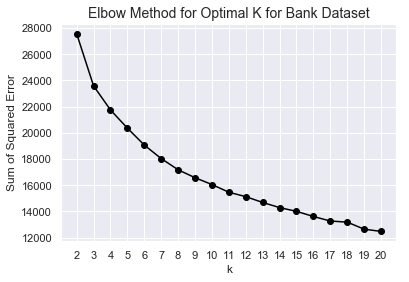

In [270]:
# Elbow method
plt.figure()
plt.plot(range(2, 21), wgs, 'o', color = 'black')
plt.plot(range(2, 21), wgs, color = 'black')
plt.title("Elbow Method for Optimal K for Bank Dataset", fontsize = 14)
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")
plt.xticks(np.arange(2, 21))


### K-clusters on Wine Dataset

([<matplotlib.axis.XTick at 0x1a241b70b8>,
 <a list of 10 Text xticklabel objects>)

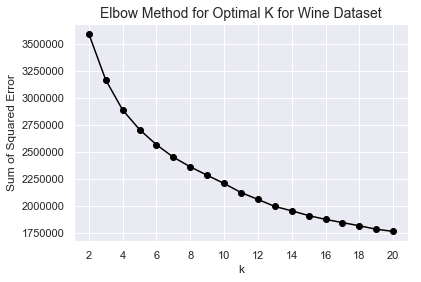

In [63]:
# Elbow method
pes, wgs = elbow_method(X_wine_norm, 2, 21)
plt.figure()
plt.plot(range(2, 21), wgs, 'o', color = 'black')
plt.plot(range(2, 21), wgs, color = 'black')
plt.title("Elbow Method for Optimal K for Wine Dataset", fontsize = 14)
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")
plt.xticks(np.arange(2, 21, 2))


In [ ]:
### K-clusters on Whole Sale Dataset

## 1.2 K-means Silhouette Plots

In [271]:
range_n_clusters = [2,4,6,8]

def silhouette_plots(range_n_clusters, X, y, x_axis, y_axis, x_col, y_col):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
        cluster_labels = clusterer.labels_
        print("NMI score: %.6f" % normalized_mutual_info_score(y, cluster_labels))

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmp = cm.get_cmap("Spectral")
            color = cmp(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        cmap = cm.get_cmap("Spectral")
        colors = cmap(cluster_labels.astype(float) / n_clusters)
        ax2.scatter( X.iloc[:, 10], X.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, x_col], centers[:, y_col], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature : {}".format(x_axis))
        ax2.set_ylabel("Feature space for the 2nd feature:{}".format(y_axis))

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()


### Visualize Wine dataset

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.104596
For n_clusters = 2 The average silhouette_score is : 0.2466440257253384


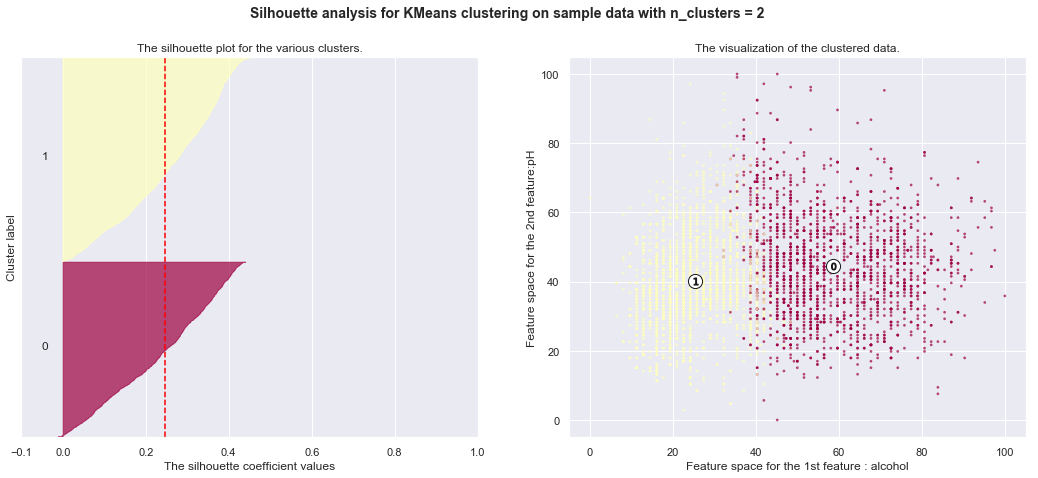

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.084505
For n_clusters = 4 The average silhouette_score is : 0.17327881867692382


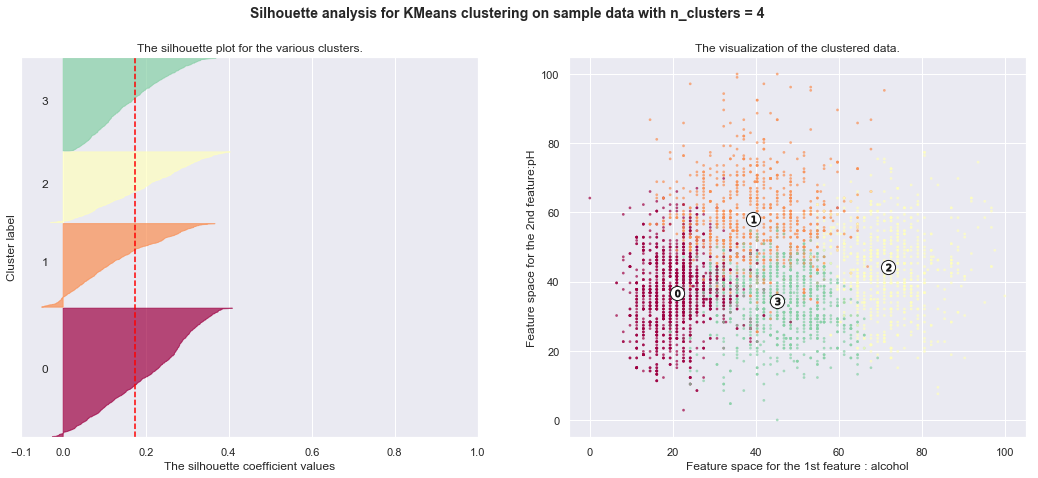

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.081843
For n_clusters = 6 The average silhouette_score is : 0.14554767436562008


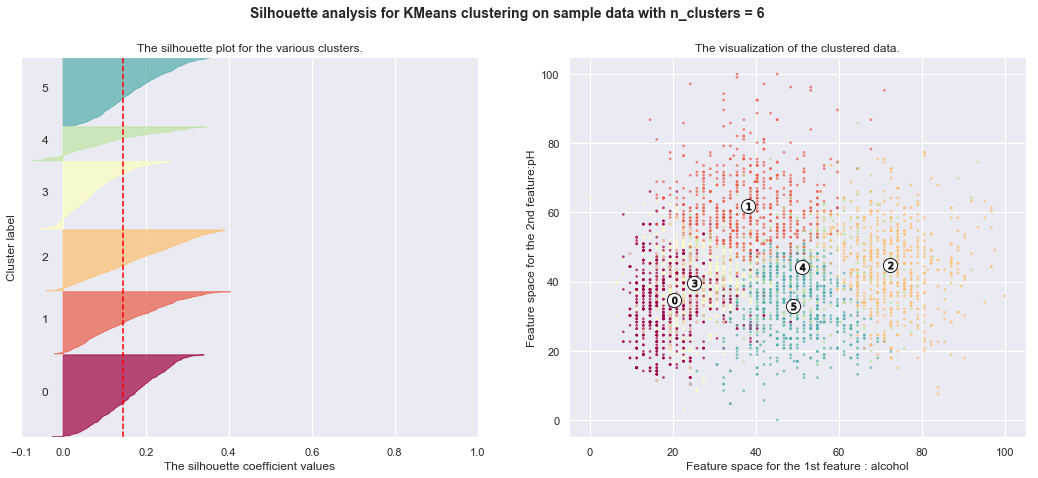

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.090088
For n_clusters = 8 The average silhouette_score is : 0.14296620461954188


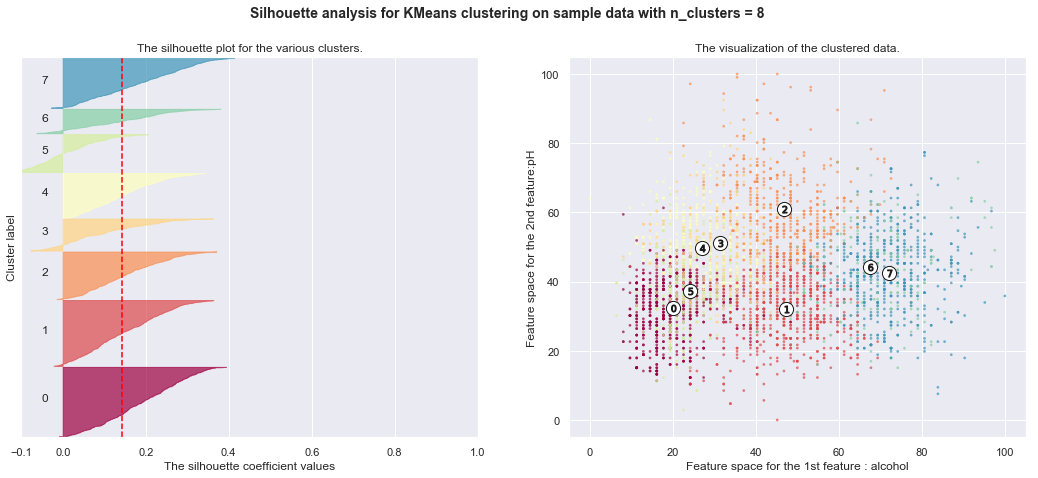

In [66]:
silhouette_plots(range_n_clusters,X_wine_norm, y_wine, 'alcohol', 'pH', 10, 8)

### Evaluate Quality of Clusters

Choose k = 4 for Bank Dataset and k = 8 for Wine Dataset

In [279]:
k1 = 4
k2 = 8
Kmeans1 = KMeans(n_clusters = k1, random_state = 7641, max_iter = 300, n_jobs = -1)
Kmeans2 = KMeans(n_clusters = k2, random_state = 7641, max_iter = 300, n_jobs = -1)
Kmeans1.fit(X_bank_norm)
Kmeans2.fit(X_wine_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=7641, tol=0.0001, verbose=0)

In [280]:
print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', Kmeans1.inertia_)
score1 = silhouette_score(X_bank_norm, Kmeans1.labels_)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y_bank, Kmeans1.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', Kmeans2.inertia_)
score2 = silhouette_score(X_wine_norm, Kmeans2.labels_)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y_wine, Kmeans2.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  21748.948831490074
Silhouette score:  0.16693830655058234
Adjusted Mutual Information (AMI) score:  0.02040006644163727

<------------------------ Dataset 2 ------------------------>
Inertia:  2364130.2510492513
Silhouette score:  0.14546136849977032
Adjusted Mutual Information (AMI) score:  0.0720709167811378



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


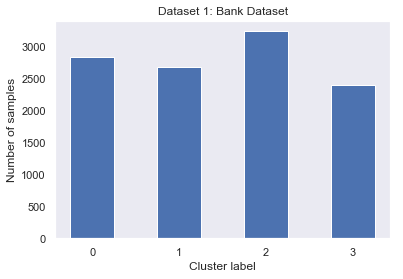

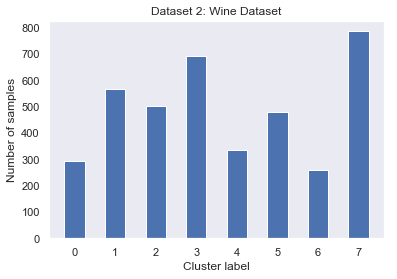

In [274]:

# Dataset 1
plt.figure()
plt.hist(Kmeans1.labels_, bins=np.arange(0, k1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1: Bank Dataset')
plt.grid()

# Dataset 2
plt.figure()
plt.hist(Kmeans2.labels_, bins=np.arange(0, k2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2: Wine Dataset')
plt.grid()


## Expectation Maxmization

### Using BIC to find the optimal number of clusters

In [275]:
random_seed = 100
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 30, 2)
n_components_grid2 = np.arange(2, 30, 2)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

#print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    #print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm1.fit(X_bank_norm)
    bic1[idx] = gmm1.bic(X_bank_norm)
#print()
#print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    #print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm2.fit(X_wine_norm)
    bic2[idx] = gmm2.bic(X_wine_norm)

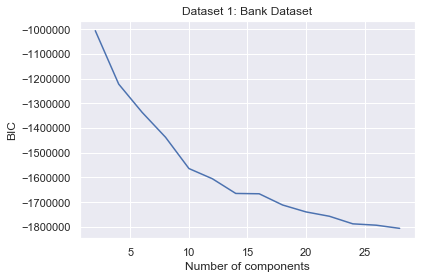

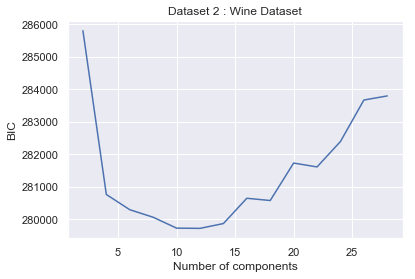

In [276]:

# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1: Bank Dataset')
plt.grid(True)

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2 : Wine Dataset')
plt.grid(True)


In [281]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  28
Optimal number of components for dataset 2:  12


In [98]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X_bank_norm)
gmm_labels1 = gmm1.predict(X_bank_norm)
gmm2.fit(X_wine_norm)
gmm_labels2 = gmm2.predict(X_wine_norm)

### Evaluate the Quality of Clusters

In [99]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X_bank_norm))
score1_gmm = silhouette_score(X_bank_norm, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y_bank, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X_wine_norm))
score2_gmm = silhouette_score(X_wine_norm, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y_wine, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  -16431743.243601272
Silhouette score:  0.09451141428456662
Adjusted Mutual Information (AMI) score:  0.020098157449610646

<------------------------ Dataset 2 ------------------------>
BIC:  279725.0946906723


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  -0.00828906949097693
Adjusted Mutual Information (AMI) score:  0.05032379277441628



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


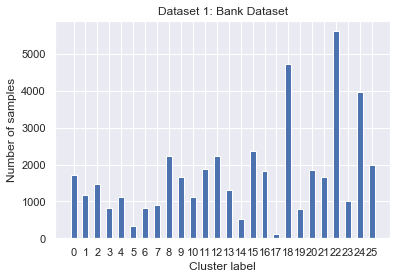

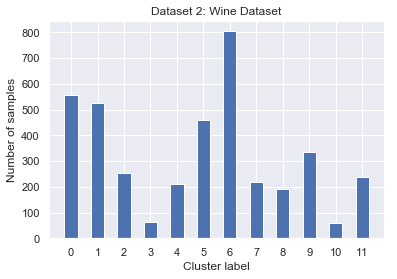

In [100]:
# Dataset 1
plt.figure()
plt.hist(gmm_labels1, bins=np.arange(0, n_best_1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1: Bank Dataset')
plt.grid(True)

# Dataset 2
plt.figure()
plt.hist(gmm_labels2, bins=np.arange(0, n_best_2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2: Wine Dataset')
plt.grid(True)


In [111]:

def visualization(X_norm, y):
    range_n_clusters = [2,4,6,8, 10, 12]

    for n_clusters in range_n_clusters:
        fig = plt.gcf()
        fig.set_size_inches(7, 7)
        ax = fig.add_subplot(111)

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_norm)
        cluster_labels = clusterer.predict(X_norm)
        print("NMI score: %.6f" % normalized_mutual_info_score(y, cluster_labels))

        # 2nd Plot showing the actual clusters formed
        cmp = cm.get_cmap("Spectral")
        colors = cmp(cluster_labels.astype(float) / n_clusters)
        plt.scatter( X_norm.iloc[:, 10], X_norm.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.means_

        # Draw white circles at cluster centers
        plt.scatter(centers[:, 10], centers[:, 8], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax.scatter( c[10], c[8], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax.set_title("The visualization of the clustered data.")
        ax.set_xlabel("Feature space for the 1st feature:alcohol")
        ax.set_ylabel("Feature space for the 2nd feature:pH")

        plt.suptitle(("Clusters plot for EM clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

NMI score: 0.049031


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


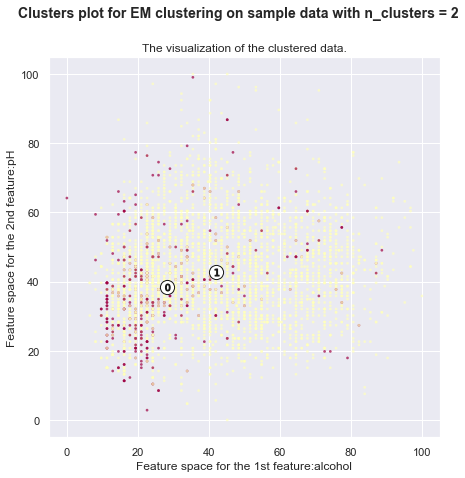

NMI score: 0.056479


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


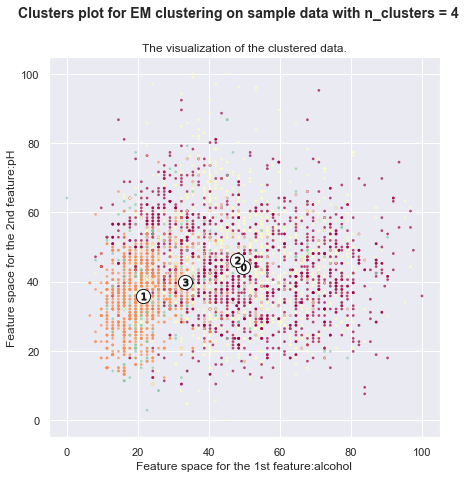

NMI score: 0.048976


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


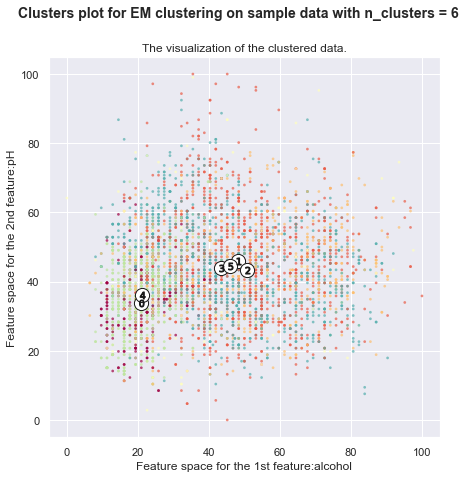

NMI score: 0.078178


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


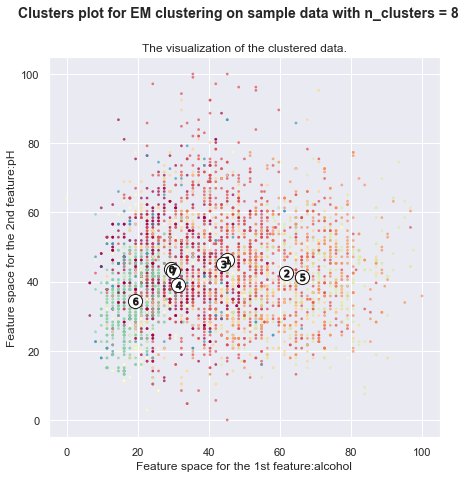

NMI score: 0.058625


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


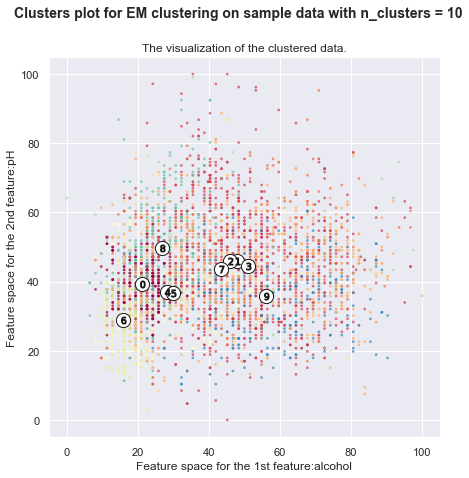

NMI score: 0.076844


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


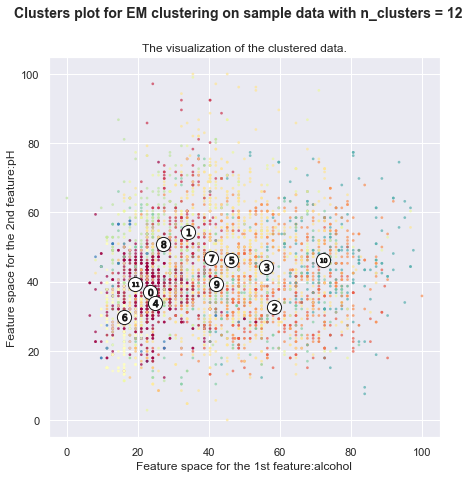

In [112]:
visualization(X_wine_norm, y_wine)

## PCA

In [113]:
from sklearn.decomposition import PCA

In [283]:
pca1 = PCA()
pca1.fit(X_bank_norm)

pca2 = PCA()
pca2.fit(X_wine_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

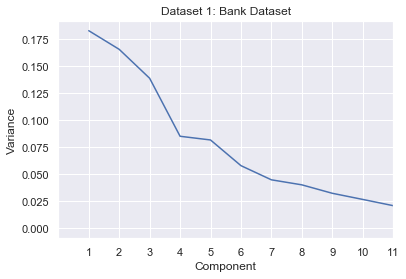

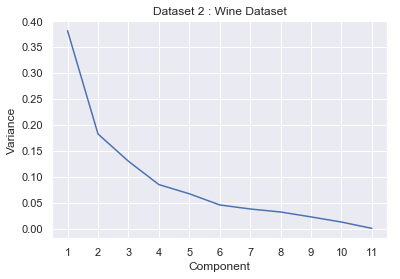

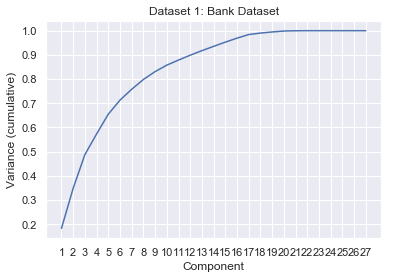

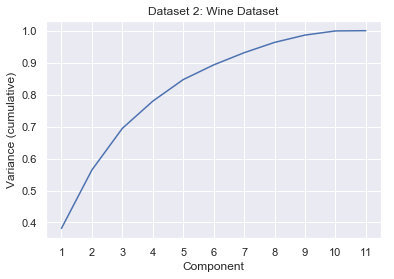

In [285]:
# Plot variance explained by each component to find the best number of components
plt.figure()
ax = plt.gca()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), pca1.explained_variance_ratio_)
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 1: Bank Dataset')
ax.set_xlim([0, 11])
#plt.xticks(np.arange(0, 80, 5))


plt.grid(True)

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), pca2.explained_variance_ratio_)
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 2 : Wine Dataset')
plt.grid(True)

plt.figure()
ax = plt.gca()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), np.cumsum(pca1.explained_variance_ratio_))
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 1: Bank Dataset')
plt.grid(True)
#plt.xticks(np.arange(0, 80, 5))

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), np.cumsum(pca2.explained_variance_ratio_))
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 2: Wine Dataset')
plt.grid(True)


In [223]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances


def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

def run_PCA(X,y,title):
    
    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    fig, ax1 = plt.subplots()
    ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'r-')
    ax2.set_ylabel('Eigenvalues', color='r')
    ax2.tick_params('y', colors='r')
    plt.grid(True)

    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()
    
def run_ICA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    ica = ICA(random_state=5)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'b-')
    plt.grid(True)
    plt.show()

def run_RCA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        rp = RCA(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'b-')
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, 'r-')
    ax2.set_ylabel('STD Reconstruction Correlation', color='r')
    ax2.tick_params('y', colors='r')
    plt.grid(True)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()


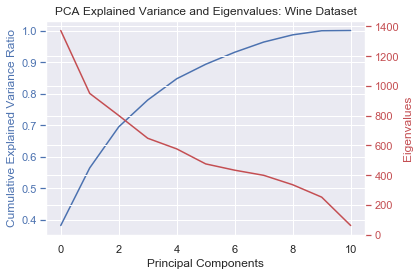

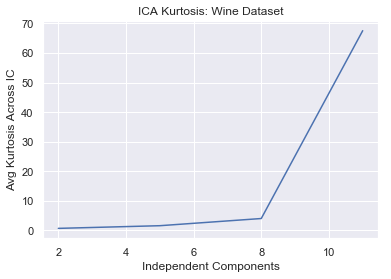

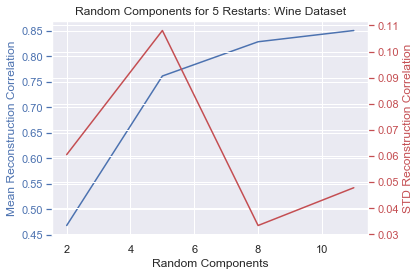

In [224]:
run_PCA(X_wine_norm, y_wine, "Wine Dataset")
run_ICA(X_wine_norm, y_wine, "Wine Dataset")
run_RCA(X_wine_norm, y_wine, "Wine Dataset")


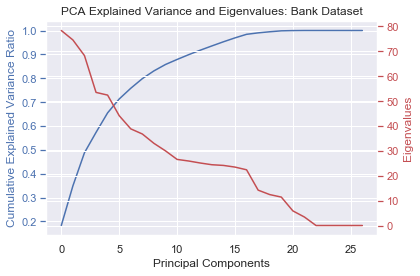

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


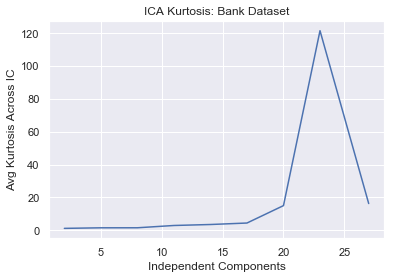

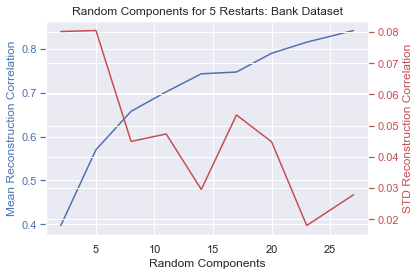

In [286]:
run_PCA(X_bank_norm, y_bank, "Bank Dataset")
run_ICA(X_bank_norm, y_bank, "Bank Dataset")
run_RCA(X_bank_norm, y_bank, "Bank Dataset")

In [167]:
def run_PCA(X, y, title, label_1, label_2):
    pca = PCA(n_components=11, random_state=10)
    X_r = pca.fit(X).transform(X)
    X_pca = X_r
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = ["b","g","r","c","m","y","k"]
    lw = 2

    for color, i in zip(colors, [label_1,label_2]):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)


explained variance ratio (first two components): [0.38158813 0.18269325 0.13013664 0.08516    0.06745186 0.04590837
 0.03813014 0.0323192  0.0228823  0.01294819 0.0007819 ]


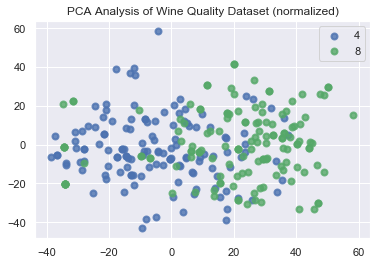

In [168]:
run_PCA(X_wine_norm, y_wine, "PCA Analysis of Wine Quality Dataset (normalized)", 4, 8)
#run_PCA(X_bank_norm, y_bank, "PCA Analysis of Bank Dataset(normalized)", 0, 1)

In [149]:
def run_ICA(X, y, title, label_1, label_2):
    ica = FastICA(n_components=11, random_state=10)
    X_r = ica.fit(X).transform(X)
    X_ica = X_r

    plt.figure()
    colors = ["b","g","r","c","m","y","k"]
    lw = 2

    for color, i in zip(colors, [label_1, label_2]):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)

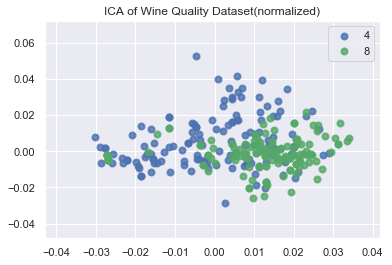

In [211]:
run_ICA(X_wine_norm, y_wine, 'ICA of Wine Quality Dataset(normalized)', 4, 8)
#run_ICA(X_bank_norm, y_bank, 'ICA of Bank Dataset(normalized)', 0, 1)


In [209]:
def run_RCA(X, y, title, label_1, label_2):
    rca = GaussianRandomProjection(n_components=11, random_state=10)
    X_r = rca.fit_transform(X)
    X_rca = X_r

    plt.figure()
    colors = ["b","g","r","c","m","y","k"]
    lw = 2

    for color, i in zip(colors, [label_1,label_2]):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)

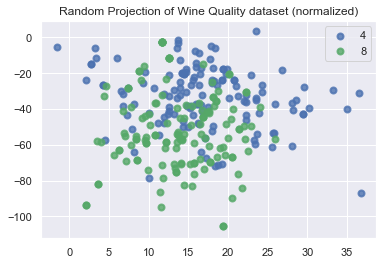

In [210]:
run_RCA(X_wine_norm, y_wine, 'Random Projection of Wine Quality dataset (normalized)', 4, 8)
#run_RCA(X_bank_norm, y_bank, 'Random Projection of Bank dataset (normalized)', 0, 1)

In [207]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

def run_rfc(X, y, title):
    
    clf = RFC(n_estimators=1000, random_state = 0, n_jobs = -1)
    clf.fit(X, y)
    sfm = SelectFromModel(clf, threshold = 0.1)
    sfm.fit(X, y)
    X_rfc = sfm.transform(X)
    
    plt.figure()
    colors = ["b","g","r","c","m","y","k"]
    lw = 2

    for color, i in zip(colors, [4,8]):
        plt.scatter(X_rfc[y == i, 0], X_rfc[y == i, 1], color=color, alpha=.8, lw=lw, label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    

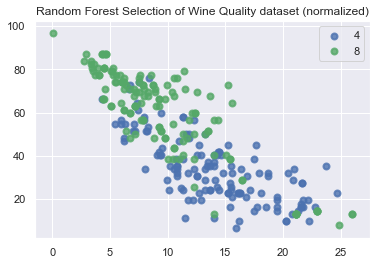

In [208]:
run_rfc(X_wine_norm, y_wine, "Random Forest Selection of Wine Quality dataset (normalized)")

In [212]:
# plot elbow for the datasets using 4 different diamension reduction
   
def plot_elbow_plot(X, y):
    # get pca dataset
    pca = PCA(n_components=11, random_state=10)
    X_pca = pca.fit(X).transform(X)
    
    # get ICA dataset
    ica = FastICA(n_components=11, random_state=10)
    X_ica = ica.fit(X).transform(X)
    
    #get RCA dataset
    rca = GaussianRandomProjection(n_components=11, random_state=10)
    X_rca = rca.fit_transform(X)
    
    #get random forest selection
    clf = RFC(n_estimators=1000, random_state = 0, n_jobs = -1)
    clf.fit(X, y)
    sfm = SelectFromModel(clf, threshold = 0.1)
    sfm.fit(X, y)
    X_rfc = sfm.transform(X)
    
    pes, wgs = elbow_method(X, 2, 21)
    pes1, wgs1 = elbow_method(X_pca, 2, 21)
    pes2, wgs2 = elbow_method(X_ica, 2, 21)
    pes3, wgs3 = elbow_method(X_rca, 2, 21)
    pes4, wgs4 = elbow_method(X_rfc, 2, 21)
    plt.figure()
    
    plt.plot(range(2, 21), wgs, 'o', color = 'orange')
    plt.plot(range(2, 21), wgs, color = 'orange', label = 'original')
    
    plt.plot(range(2, 21), wgs1, 'o', color = 'black')
    plt.plot(range(2, 21), wgs1, color = 'black', label = 'PCA')
    plt.plot(range(2, 21), wgs2, 'o', color = 'red')
    plt.plot(range(2, 21), wgs2, color = 'red', label = 'ICA')
    plt.plot(range(2, 21), wgs3, 'o', color = 'blue')
    plt.plot(range(2, 21), wgs3, color = 'blue', label = 'RCA')
    plt.plot(range(2, 21), wgs4, 'o', color = 'green')
    plt.plot(range(2, 21), wgs4, color = 'green', label = 'FS')
    
    plt.title("Elbow Method for Optimal K for Wine Dataset", fontsize = 14)
    plt.xlabel("k")
    plt.ylabel("Sum of Squared Error")
    plt.xticks(np.arange(2, 21, 2))
    plt.legend()
    plt.show()


In [300]:
# get PCA dataset
pca = PCA(n_components=5, random_state=10)
X_pca = pca.fit(X_wine_norm).transform(X_wine_norm)
    
# get ICA dataset
ica = FastICA(n_components=8, random_state=10)
X_ica = ica.fit(X_wine_norm).transform(X_wine_norm)
    
#get RCA dataset
rca = GaussianRandomProjection(n_components=8, random_state=10)
X_rca = rca.fit_transform(X_wine_norm)
    
#get random forest selection
clf = RFC(n_estimators=1000, random_state = 0, n_jobs = -1)
clf.fit(X_wine_norm, y_wine)
sfm = SelectFromModel(clf, threshold = 0.1)
sfm.fit(X_wine_norm, y_wine)
X_rfc = sfm.transform(X_wine_norm)


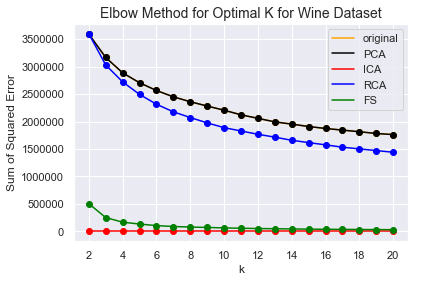

In [213]:
plot_elbow_plot(X_wine_norm, y_wine)

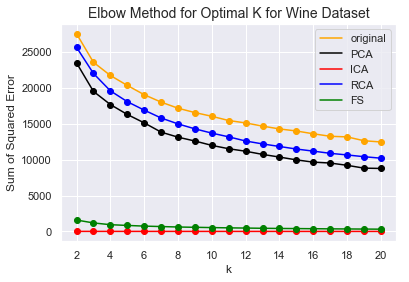

In [287]:
plot_elbow_plot(X_bank_norm, y_bank)

In [294]:
#Rerun clustering on transformed features
def run_cluster_again(X, y, method):
    range_n_clusters = [4]
    
    X_test=pd.DataFrame(X)
    for n_clusters in range_n_clusters:
        fig = plt.gcf()
        fig.set_size_inches(7, 7)
        ax = fig.add_subplot(111)

        clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X_test)
        cluster_labels = clusterer.labels_

        silhouette_avg = silhouette_score(X_test, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        print("The NMI score is: %.6f" % normalized_mutual_info_score(y, cluster_labels))

        
        cmp = cm.get_cmap("Spectral")
        colors = cmp(cluster_labels.astype(float) / n_clusters)
        ax.scatter( X_test.iloc[:, 0], X_test.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_

        ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax.set_title("The visualization of the clustered data.")
        ax.set_xlabel("Feature space for the 1st feature")
        ax.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("KMeans clustering using {} feature transformation with n_clusters = 4".format(method)),
                     fontsize=14, fontweight='bold')

        plt.show()

    for n_clusters in range_n_clusters:
        fig = plt.gcf()
        fig.set_size_inches(7, 7)
        ax = fig.add_subplot(111)

        clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_test)
        cluster_labels = clusterer.predict(X_test)
        print("NMI score: %.6f" % normalized_mutual_info_score(y, cluster_labels))

        cmp = cm.get_cmap("Spectral")
        colors = cmp(cluster_labels.astype(float) / n_clusters)
        plt.scatter( X_test.iloc[:, 0], X_test.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.means_

        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax.set_title("The visualization of the clustered data.")
        ax.set_xlabel("Feature space for the 1st feature")
        ax.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Clusters plot for EM clustering on {} data with n_clusters =4".format(method)), 
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 4 The average silhouette_score is : 0.17327881867692382
The NMI score is: 0.084505


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


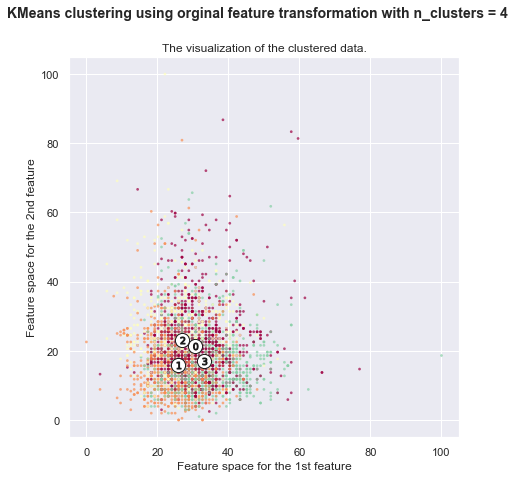

NMI score: 0.056479


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


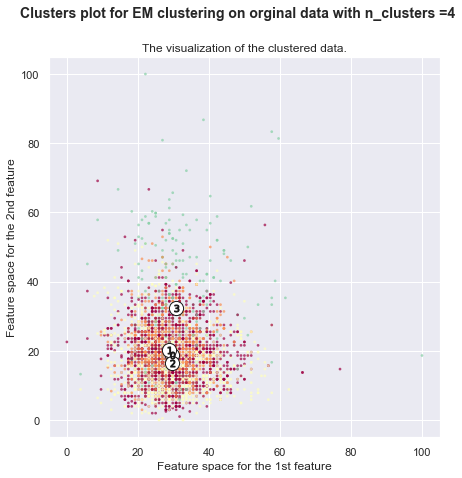

For n_clusters = 4 The average silhouette_score is : 0.21858722807370415
The NMI score is: 0.085412


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


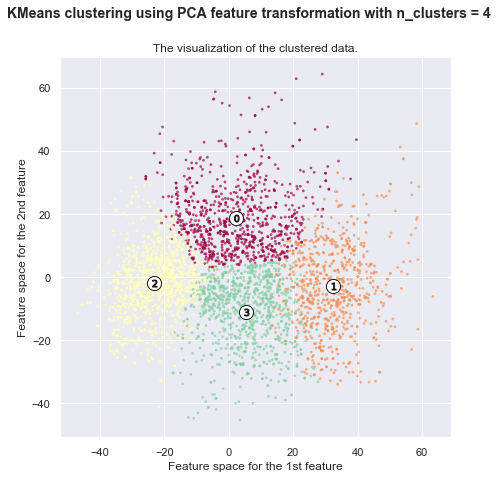

NMI score: 0.068794


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


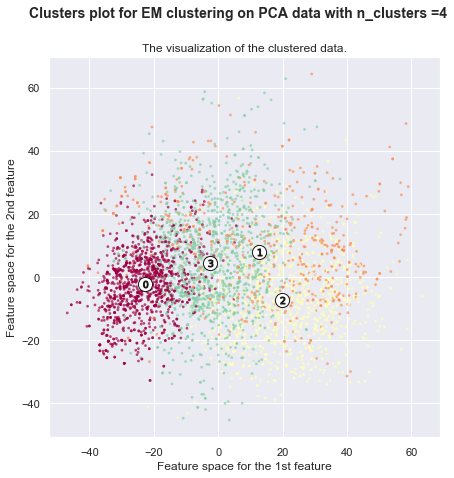

For n_clusters = 4 The average silhouette_score is : 0.11896782055611983
The NMI score is: 0.084760


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


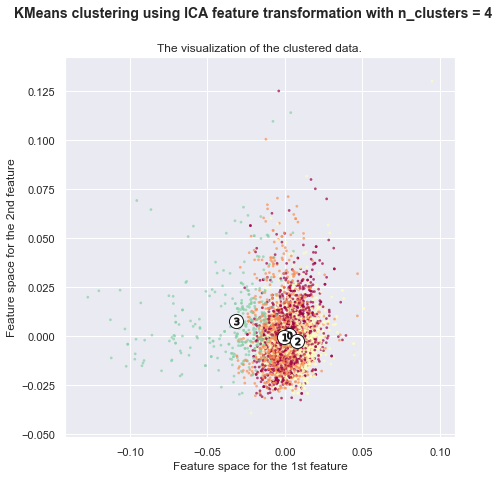

NMI score: 0.064733


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


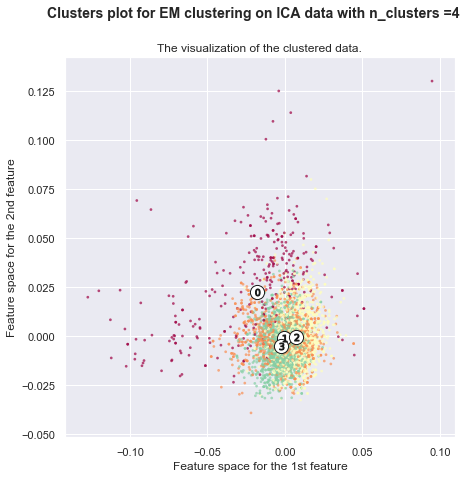

For n_clusters = 4 The average silhouette_score is : 0.19779839838949848
The NMI score is: 0.077950


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


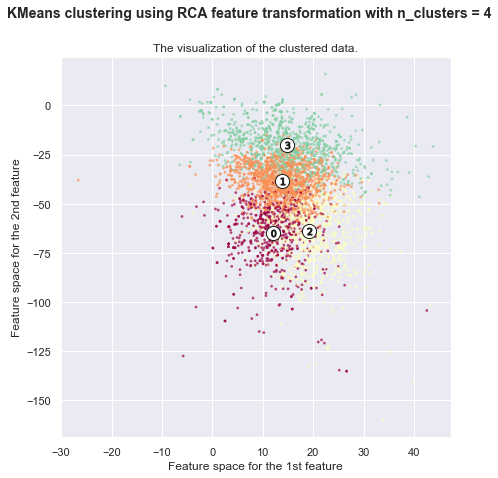

NMI score: 0.086415


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


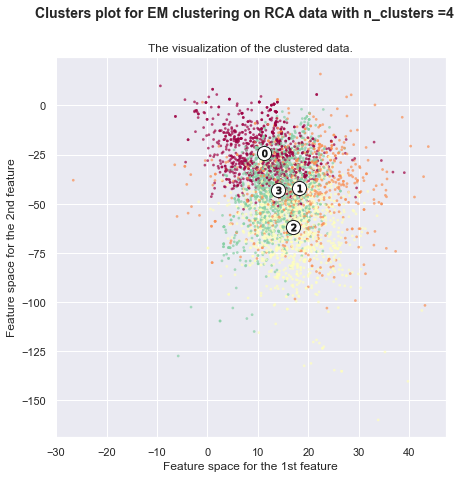

For n_clusters = 4 The average silhouette_score is : 0.49664875653420515
The NMI score is: 0.099226


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


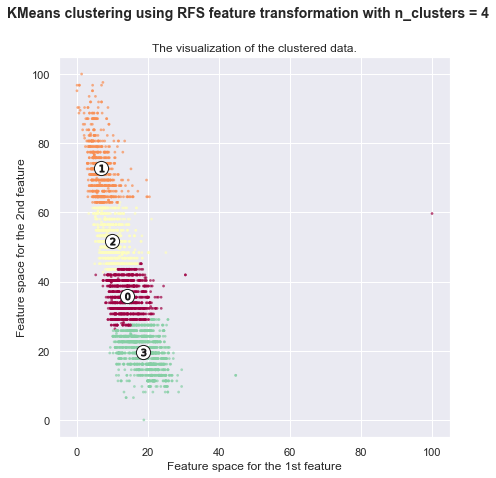

NMI score: 0.094662


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


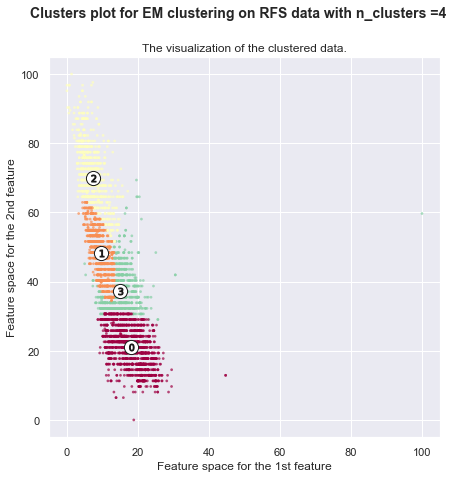

In [301]:
run_cluster_again(X_wine_norm, y_wine,"orginal")
run_cluster_again(X_pca, y_wine, "PCA")
run_cluster_again(X_ica, y_wine, "ICA")
run_cluster_again(X_rca, y_wine, "RCA")
run_cluster_again(X_rfc, y_wine, "RFS")


In [296]:
# get PCA dataset
pca = PCA(n_components=9, random_state=10)
X_pca = pca.fit(X_bank_norm).transform(X_bank_norm)
    
# get ICA dataset
ica = FastICA(n_components=11, random_state=10)
X_ica = ica.fit(X_bank_norm).transform(X_bank_norm)
    
#get RCA dataset
rca = GaussianRandomProjection(n_components=11, random_state=10)
X_rca = rca.fit_transform(X_bank_norm)
    
#get random forest selection
clf = RFC(n_estimators=1000, random_state = 0, n_jobs = -1)
clf.fit(X_bank_norm, y_bank)
sfm = SelectFromModel(clf, threshold = 0.1)
sfm.fit(X_bank_norm, y_bank)
X_rfc = sfm.transform(X_bank_norm)
print(X_rfc.shape)


(11162, 3)


For n_clusters = 4 The average silhouette_score is : 0.16693830655058234
The NMI score is: 0.028951


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


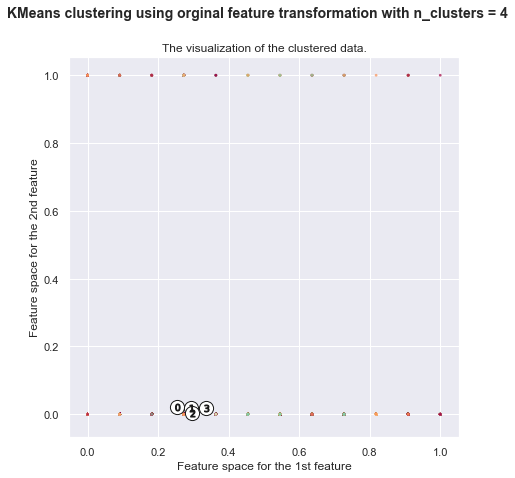

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.030469


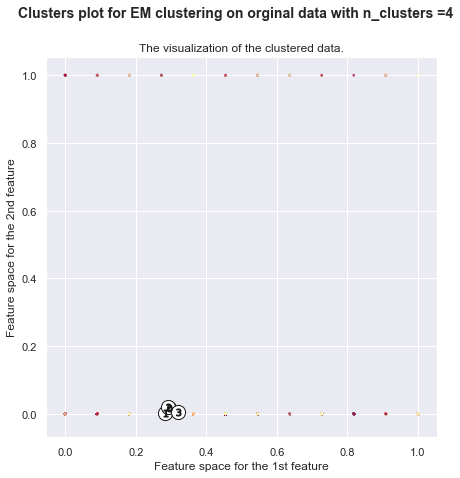

For n_clusters = 4 The average silhouette_score is : 0.21345311874062853
The NMI score is: 0.028951


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


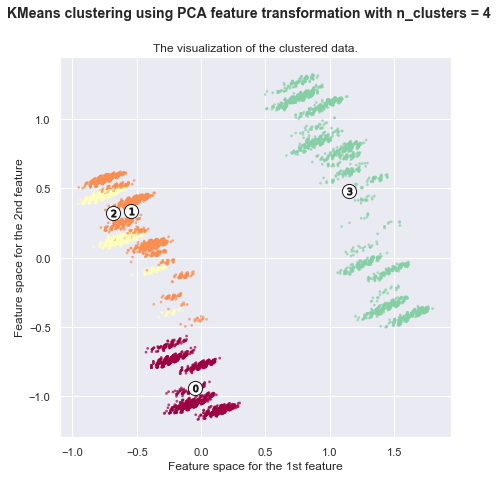

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.028951


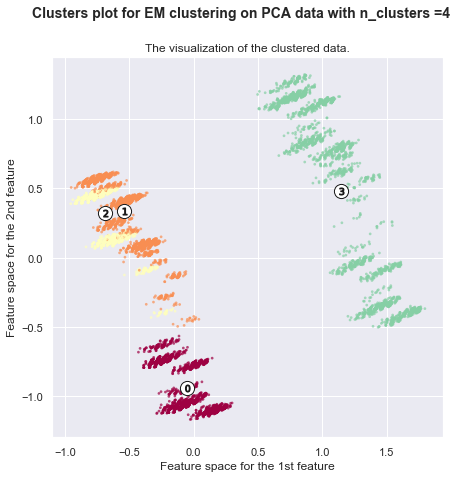

For n_clusters = 4 The average silhouette_score is : 0.14601334858987963
The NMI score is: 0.010898


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


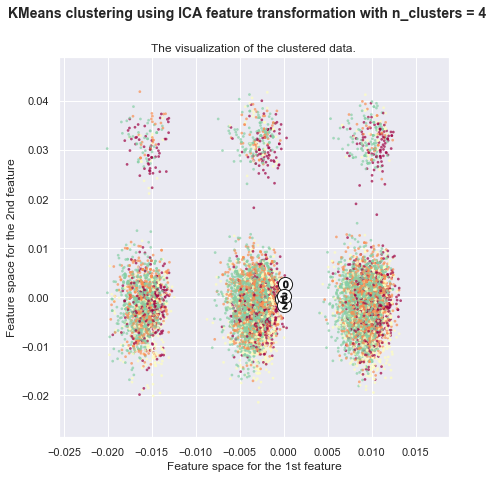

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.027303


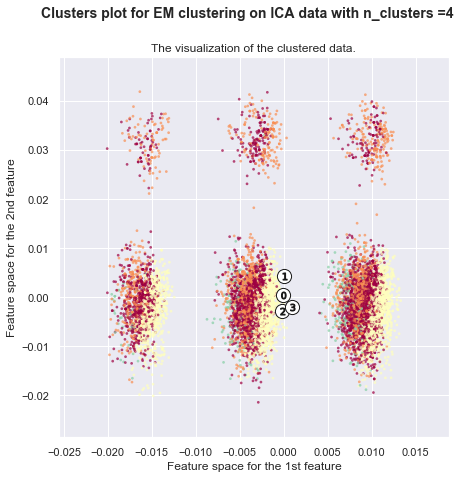

For n_clusters = 4 The average silhouette_score is : 0.17568827281514002
The NMI score is: 0.006372


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


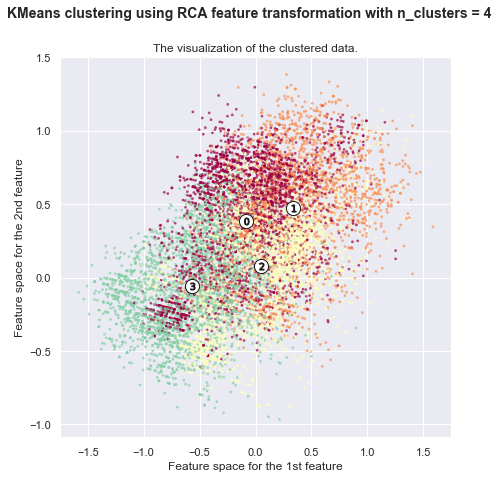

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.018913


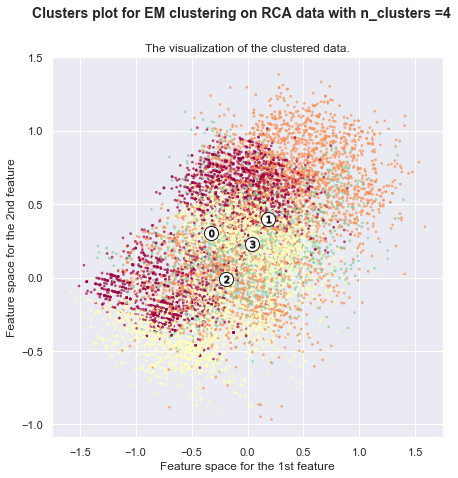

For n_clusters = 4 The average silhouette_score is : 0.29097756352223636
The NMI score is: 0.010570


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


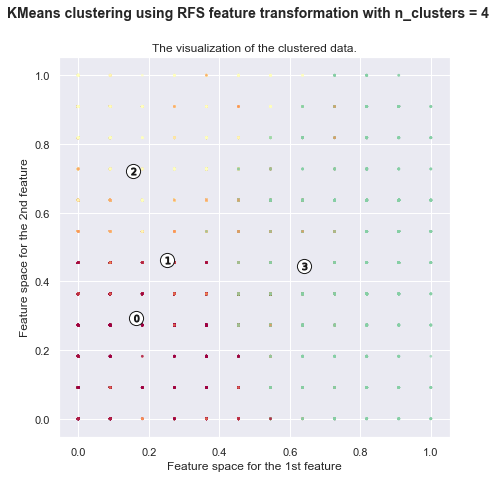

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.009148


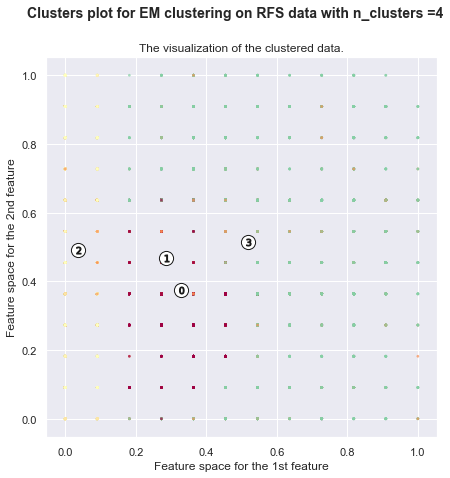

In [299]:
run_cluster_again(X_bank_norm, y_bank,"orginal")
run_cluster_again(X_pca, y_bank, "PCA")
run_cluster_again(X_ica, y_bank, "ICA")
run_cluster_again(X_rca, y_bank, "RCA")
run_cluster_again(X_rfc, y_bank, "RFS")

## Running Neural Network on datasets with dimensionality reduction 

In [308]:
#Rerun ANN on transformed features

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

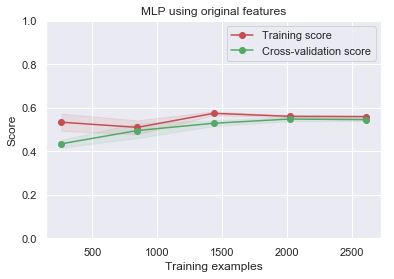

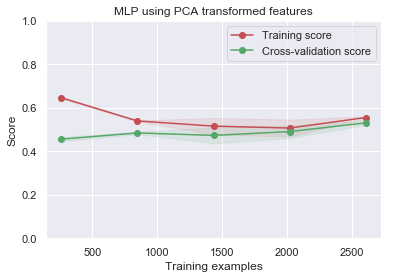

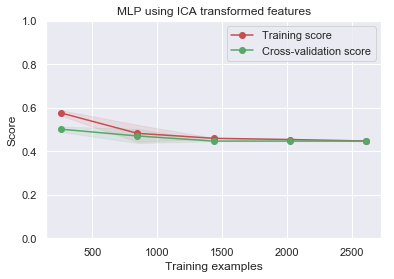

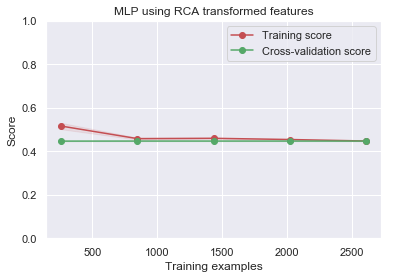

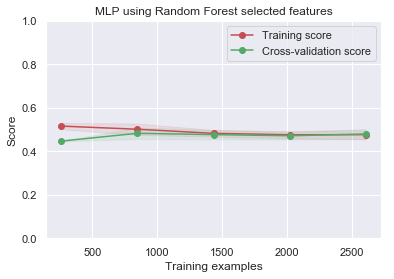

In [310]:
clf = MLPClassifier(hidden_layer_sizes=(20, 5), random_state=0, solver="lbfgs")
plot_learning_curve(clf, "MLP using original features", X_wine_norm, y_wine, ylim=[0,1])
plot_learning_curve(clf, "MLP using PCA transformed features", X_pca, y_wine, ylim=[0,1])
plot_learning_curve(clf, "MLP using ICA transformed features", X_ica, y_wine, ylim=[0,1])
plot_learning_curve(clf, "MLP using RCA transformed features", X_rca, y_wine, ylim=[0,1])
plot_learning_curve(clf, "MLP using Random Forest selected features", X_rfc, y_wine, ylim=[0,1])

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

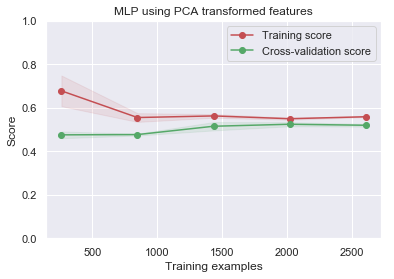

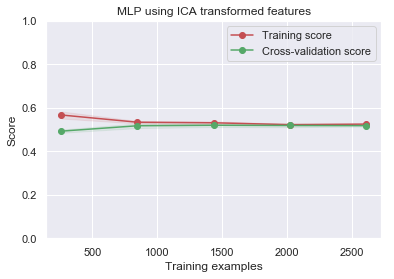

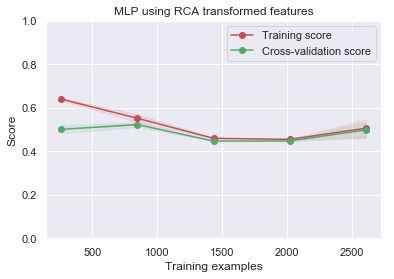

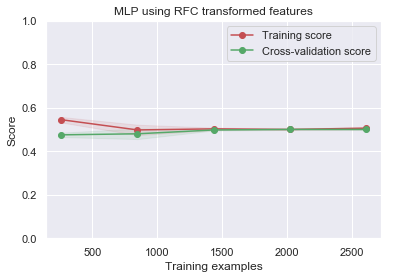

In [317]:
#Rerun ANN on transformed features with clusters new feature

clf = MLPClassifier(hidden_layer_sizes=(20, 5), random_state=0, solver="lbfgs")

clusterer = KMeans(n_clusters=6, random_state=10).fit(X_pca)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_pca)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using PCA transformed features", X_df, y_wine, ylim=[0,1])

clusterer = KMeans(n_clusters=6, random_state=10).fit(X_ica)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_ica)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using ICA transformed features", X_df, y_wine, ylim=[0,1])

clusterer = KMeans(n_clusters=6, random_state=10).fit(X_rca)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_rca)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using RCA transformed features", X_df, y_wine, ylim=[0,1])

clusterer = KMeans(n_clusters=6, random_state=10).fit(X_rfc)
y_kmeans = clusterer.labels_
X_df = pd.DataFrame(X_rfc)
X_df[11] = y_kmeans
plot_learning_curve(clf, "MLP using RFC transformed features", X_df, y_wine, ylim=[0,1])
